SVM

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [2]:
x = torch.randn(2500, 2)
y = torch.where(x[:, 0] > x[:, 1], 1, -1).float()

dataset = TensorDataset(x, y)
loader = DataLoader(dataset, batch_size=36)

In [3]:
class SVM(nn.Module) :
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 1)
        
    def forward(self, x):
        return self.linear(x)

In [4]:
model = SVM()
criterion = nn.HingeEmbeddingLoss()
# must be assigned as pos 1 , neg -1 classes
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [5]:
for epoch in range(100) :
    for inputs, targets in loader:
        output = model(inputs)
        loss = criterion(output.squeeze(), targets)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        

In [6]:
#####################

이상 탐지 예제 using one-class-SVM

In [7]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.svm import OneClassSVM

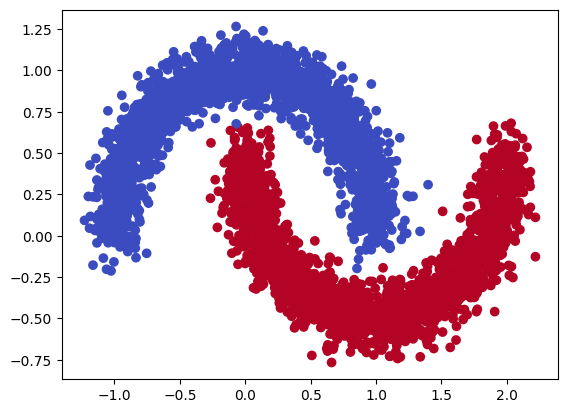

In [8]:
x, y = make_moons(n_samples=4000, noise=0.1, random_state=777)

plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.show()

In [9]:
outliers_ratio = 0.1
n_outliers = int(outliers_ratio * len(x))
n_inliers = len(x) - n_outliers

rng = np.random.RandomState(777)
x_outliers = 1.5 * rng.uniform(low=-1, high=3, size=(n_outliers, 2))

x= np.vstack([x, x_outliers])
y= np.hstack([y, -1 * np.ones(n_outliers)]) #이상치 데이터 class

In [10]:
x = (x- x.mean(axis=0)) / x.std(axis=0)


x_train, x_test, y_train, y_test = train_test_split(x, y ,test_size=0.1, random_state = 777)


model = OneClassSVM(nu=0.05, kernel='rbf', gamma = 'auto')
model.fit(x)
y_pred = model.predict(x_test)
y_pred = np.where(y_pred == 1, 0, y_pred)

In [11]:
score = f1_score(y_test, y_pred, average="macro")
print(f"F1 Score >> {score}")
"""
F1 score 는 정밀도 와 재현율의 조화 평균으로 계산 됩니다.

정밀도 = TP / (TP + FP)
재현율 = TP / (TP + FN)

F1 score = 2 * (정밀도 * 재현율) / (정밀도 + 재현율)

FN : 거짓 음성 -> 실제는 양성인데 음성이라고 하는 경우 
TP : 참 양성 -> 실제 양성인데 양성이라고 하는 경우 
FP : 거짓 양성 - > 실제는 음성인데 양성이라고 하는 경우 
"""

F1 Score >> 0.4534864265696239


'\nF1 score 는 정밀도 와 재현율의 조화 평균으로 계산 됩니다.\n\n정밀도 = TP / (TP + FP)\n재현율 = TP / (TP + FN)\n\nF1 score = 2 * (정밀도 * 재현율) / (정밀도 + 재현율)\n\nFN : 거짓 음성 -> 실제는 양성인데 음성이라고 하는 경우 \nTP : 참 양성 -> 실제 양성인데 양성이라고 하는 경우 \nFP : 거짓 양성 - > 실제는 음성인데 양성이라고 하는 경우 \n'

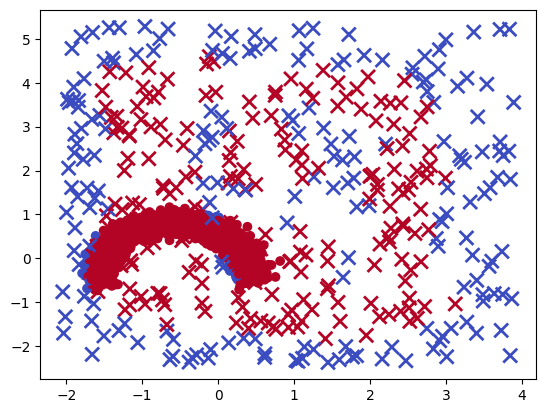

In [18]:
# 모든 데이터 포인트에 대한 예측 결과 얻기
y_pred_all = model.predict(x)

 

# 이상치 데이터와 정상 데이터를 분리하여 시각화
x_inliers = x[y == 0]
x_outliers = x[y == -1]
y_pred_inliers = y_pred_all[y == 0]
y_pred_outliers = y_pred_all[y == -1]

 

plt.scatter(x_inliers[:, 0], x_inliers[:, 1], c=y_pred_inliers, cmap=plt.cm.coolwarm)
plt.scatter(x_outliers[:, 0], x_outliers[:, 1], c=y_pred_outliers, cmap=plt.cm.coolwarm, marker='x', 
            s=100, linewidth=2)
plt.show()

Image Classification with SVM

In [13]:
import torch
import torchvision
import torchvision.transforms as transforms
from sklearn.svm import SVC
from tqdm import tqdm

In [14]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.3,))
])

train_dataset = torchvision.datasets.MNIST(root="./dataset", train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root="./dataset", train=False, download=False, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = 1000, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(train_dataset, batch_size = 1000, shuffle=False, num_workers=2)

In [15]:
train_feats = []
train_labels = []

for i, data in enumerate(train_loader, 0):
    inputs, labels = data
    inputs = inputs.view(inputs.shape[0], -1)
    train_feats.append(inputs)
    train_labels.append(labels)
    
train_feats = torch.cat(train_feats, dim=0)
train_labels = torch.cat(train_labels, dim=0)

test_feats = []
test_labels = []

for i , data in enumerate(test_loader, 0) :
    inputs, labels = data
    inputs = inputs.view(inputs.shape[0], -1)
    test_feats.append(inputs)
    test_labels.append(labels)
    
test_feats = torch.cat(test_feats, dim=0)
test_labels = torch.cat(test_labels, dim=0)

KeyboardInterrupt: 

In [ ]:
import time
print("SVM MODEL TRAIN AND TEST")
start_time = time.time()
model = SVC(C=1.0, kernel='rbf', gamma= 0.01)
model.fit(train_feats.numpy(), train_labels.numpy())
acc = model.sfcore(test_feats.numpy(), test_labels.numpy())

end_time = time.time()
print("ACC >>", acc)
train_time = end_time - start_time
print("Training Tiem : {:.2f} seconds".format(train_time))